<a href="https://colab.research.google.com/github/Precillieo/Financial-Model/blob/main/Finance_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [2]:
df= pd.read_excel('/content/drive/MyDrive/Mr Olowe/Data Extract for Machine Learning 20201213.xlsx')

In [3]:
df.head()

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,gender,marital_status,no_of_dependent,type_of_residence,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,address,requested_amount,purpose,proposed_payday,credit_score,location
0,3600.0,1277.64,4877.64,21 days,35.49,1,RUNNING,Mastercard,102023.0,Guaranty Trust Bank,805,1984-07-25,NaN,Pending,Male,Married,2,Parents Apartment,Diploma/School Cert,Self Employed,Agriculture,"10,000 - 54,999",2017-10-07 01:00:00,0,Umuahia,12000.0,Business,30 days,63.040,abia
1,10000.0,500.00,0.00,1 days,5.00,2,SETTLED,Visa,NaN,NaN,813,1986-11-14,NaN,Successful,Female,Married,3 or more,Own House,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,Umuahia,15000.0,Personal,30 days,65.220,abia
2,10000.0,500.00,0.00,1 days,5.00,2,SETTLED,Mastercard,92023.0,United Bank for Africa,813,1986-11-14,NaN,Successful,Female,Married,3 or more,Own House,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,Umuahia,15000.0,Personal,30 days,65.220,abia
3,3600.0,1277.64,5573.64,21 days,35.49,5,PAST DUE,Mastercard,22023.0,United Bank for Africa,703,1980-05-17,NaN,Pending,Male,Single,0,Own House,Diploma/School Cert,Local Govt: Public,Agriculture,"10,000 - 54,999",2007-07-01 00:00:00,0,Aba,15000.0,Medical,30 days,66.904,abia
4,5000.0,424.11,0.00,30 days,8.60,2,SETTLED,Mastercard,42022.0,Polaris Bank,803,1975-01-20,Tier 2,Successful,NaN,Married,2,NaN,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",2002-01-01 00:00:00,0,NaN,20000.0,Medical,30 days,68.670,abia


In [4]:
df.shape

(2981, 30)

In [5]:
df.corr()

,loan_amount,interest_due,amount_due,interest_rate,status_id,card_expiry,phone_network,work_email_validated,requested_amount,credit_score
loan_amount,1.000000,0.844030,0.673658,-0.029748,-0.080333,0.020951,-0.024393,-0.064608,0.026020,0.058550
interest_due,0.844030,1.000000,0.682882,0.261310,-0.110580,0.031285,-0.001660,0.000497,0.004526,0.058809
amount_due,0.673658,0.682882,1.000000,0.190289,0.005651,0.025132,0.011969,-0.036102,0.022740,0.043661
interest_rate,-0.029748,0.261310,0.190289,1.000000,-0.228158,0.030373,-0.003669,0.223259,-0.009559,0.235940
status_id,-0.080333,-0.110580,0.005651,-0.228158,1.000000,-0.038125,0.024915,0.033600,-0.016094,-0.122238
card_expiry,0.020951,0.031285,0.025132,0.030373,-0.038125,1.000000,0.027508,-0.011407,0.000766,0.039887
phone_network,-0.024393,-0.001660,0.011969,-0.003669,0.024915,0.027508,1.000000,-0.014131,0.005946,-0.066709
work_email_validated,-0.064608,0.000497,-0.036102,0.223259,0.033600,-0.011407,-0.014131,1.000000,-0.003703,0.073265
requested_amount,0.026020,0.004526,0.022740,-0.009559,-0.016094,0.000766,0.005946,-0.003703,1.000000,0.044138
credit_score,0.058550,0.058809,0.043661,0.235940,-0.122238,0.039887,-0.066709,0.073265,0.044138,1.000000


In [6]:
#df[df.columns[1:]].corrwith(df['status'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amount             2981 non-null   float64       
 1   interest_due            2981 non-null   float64       
 2   amount_due              2981 non-null   float64       
 3   tenor                   2981 non-null   object        
 4   interest_rate           2958 non-null   float64       
 5   status_id               2981 non-null   int64         
 6   status                  2981 non-null   object        
 7   card_network            2981 non-null   object        
 8   card_expiry             2941 non-null   float64       
 9   bank                    2941 non-null   object        
 10  phone_network           2981 non-null   int64         
 11  date_of_birth           2981 non-null   datetime64[ns]
 12  tier                    2472 non-null   object  

# Visualizing The Target Value

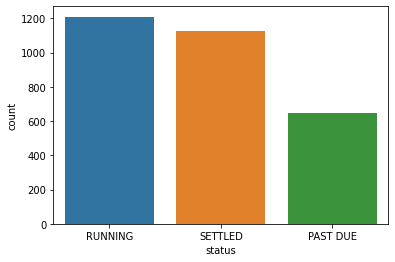

In [8]:
sns.countplot(x= df['status'])

# Working With Date Related Columns
### Date Of Birth
### Work Start Date

In [9]:
date_column= ['date_of_birth', 'work_start_date']

In [10]:
def extract_date(df,cols,):
    for x in cols:
        df[x +'_year'] = df[x].dt.quarter
        df[x +'_day'] = df[x].dt.day
        df[x +'_month'] = df[x].dt.month
        df[x +'_quarter'] = df[x].dt.quarter
    df.drop(columns=date_column,axis=1,inplace=True)

In [11]:
extract_date(df,date_column)

# Working On Date Column2
### Tenor

In [12]:
df['tenor'].value_counts()

1 months    673
30 days     656
15 days     655
14 days     297
4 weeks     168
21 days     158
3 weeks     103
20 days      49
7 days       46
1 days       44
28 days      42
25 days      27
16 days      18
10 days      13
29 days       8
17 days       5
18 days       5
22 days       5
27 days       3
26 days       2
12 days       1
23 days       1
19 days       1
24 days       1
Name: tenor, dtype: int64

In [13]:
df['tenor']= df['tenor'].replace(['4 weeks', '3 weeks', '1 months'], ['30 days', '21 days', '30 days'])

# Filling Missing Values

In [14]:
df.isnull().sum()

loan_amount                   0
interest_due                  0
amount_due                    0
tenor                         0
interest_rate                23
status_id                     0
status                        0
card_network                  0
card_expiry                  40
bank                         40
phone_network                 0
tier                        509
selfie_id_check             383
gender                     2423
marital_status                0
no_of_dependent               0
type_of_residence          2423
educational_attainment        0
employment_status             0
sector_of_employment          0
monthly_net_income            0
work_email_validated          0
address                    2423
requested_amount              0
purpose                       0
proposed_payday               0
credit_score                  0
location                      0
date_of_birth_year            0
date_of_birth_day             0
date_of_birth_month           0
date_of_

## Interest Rate Column

In [15]:
df['interest_rate'].value_counts()

25.20    295
35.49    122
15.00    107
11.33     47
11.32     46
        ... 
8.36       1
19.45      1
9.98       1
8.37       1
8.23       1
Name: interest_rate, Length: 390, dtype: int64

In [16]:
df['interest_rate']= df['interest_rate'].fillna(df['interest_rate'].mean())

## Card Expiry Column

In [17]:
 df['card_expiry'].value_counts()

22023.0     167
32023.0     158
82023.0     148
92023.0     143
72023.0     140
12023.0     114
122022.0    113
102023.0    108
92022.0     107
22022.0      96
72022.0      96
102022.0     93
82022.0      90
52023.0      87
62023.0      84
62022.0      82
42022.0      82
12022.0      82
112022.0     81
122021.0     71
32022.0      69
112021.0     65
52022.0      59
82021.0      56
112023.0     53
102021.0     49
92021.0      45
72021.0      39
52021.0      36
62021.0      35
42021.0      33
122023.0     27
82024.0      26
42023.0      25
102024.0     24
52024.0      22
92024.0      19
72024.0      18
32021.0      18
32024.0      16
22024.0      12
12021.0      12
12024.0      11
62024.0      11
42024.0       6
112024.0      5
102020.0      3
22021.0       3
122024.0      1
112020.0      1
Name: card_expiry, dtype: int64

In [18]:
df['card_expiry']= df['card_expiry'].fillna(df['card_expiry'].mean())

## Bank, Tier, Selfie_id_check Columns

In [19]:
df['tier'].value_counts()

Tier 1    1874
Tier 2     406
Tier 3     192
Name: tier, dtype: int64

In [20]:
df['selfie_id_check'].value_counts()

Successful    1141
Pending        817
Failed         640
Name: selfie_id_check, dtype: int64

In [21]:
df['bank'].value_counts()

Guaranty Trust Bank         774
Access Bank                 462
First Bank of Nigeria       371
Zenith Bank                 360
United Bank for Africa      314
Union Bank of Nigeria        99
First City Monument Bank     78
Ecobank Nigeria              78
Sterling Bank                76
Stanbic IBTC Bank            74
Polaris Bank                 73
Fidelity Bank                60
Access Bank (Diamond)        35
Keystone Bank                29
Wema Bank                    29
Unity Bank                   16
Jaiz Bank                     5
Heritage Bank                 3
SunTrust Bank                 2
Suntrust Bank                 2
Providus Bank                 1
Name: bank, dtype: int64

In [22]:
val= ['bank', 'tier', 'selfie_id_check']
for x in val:
  df[x]= df[x].fillna(df[x].mode()[0])

# Dropping Missing Values

In [23]:
df= df.drop(['gender', 'type_of_residence', 'address'], axis= 1)

In [24]:
df.isnull().sum()

loan_amount                0
interest_due               0
amount_due                 0
tenor                      0
interest_rate              0
status_id                  0
status                     0
card_network               0
card_expiry                0
bank                       0
phone_network              0
tier                       0
selfie_id_check            0
marital_status             0
no_of_dependent            0
educational_attainment     0
employment_status          0
sector_of_employment       0
monthly_net_income         0
work_email_validated       0
requested_amount           0
purpose                    0
proposed_payday            0
credit_score               0
location                   0
date_of_birth_year         0
date_of_birth_day          0
date_of_birth_month        0
date_of_birth_quarter      0
work_start_date_year       0
work_start_date_day        0
work_start_date_month      0
work_start_date_quarter    0
dtype: int64

# Converting Categorical Column to Nummerical Columns with Label Encoder

In [25]:
col= ['tenor', 'card_network', 'bank', 'tier', 'selfie_id_check', 'marital_status', 'no_of_dependent', 'educational_attainment', 'employment_status', 'sector_of_employment', 'monthly_net_income', 'purpose', 'proposed_payday', 'location']

In [26]:
for y in col:
  df[y]= df[y].astype(str)

In [27]:
for y in col:
  le= LabelEncoder()
  df[y]= le.fit_transform(df[y])

# Splitting Df into Training and Testing Data

In [28]:
train1= df[df['status']== 'SETTLED']
train2= df[df['status'] == 'PAST DUE']
test= df[df['status'] == 'RUNNING']

In [29]:
test.head()

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,phone_network,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location,date_of_birth_year,date_of_birth_day,date_of_birth_month,date_of_birth_quarter,work_start_date_year,work_start_date_day,work_start_date_month,work_start_date_quarter
0,3600.0,1277.64,4877.64,10,35.49,1,RUNNING,0,102023.0,6,805,0,1,1,4,1,6,0,0,0,12000.0,1,19,63.04,0,3,25,7,3,4,7,10,4
5,5000.0,1000.00,6000.00,19,19.21,1,RUNNING,0,92022.0,17,813,0,2,3,1,0,1,13,2,0,5000.0,1,21,57.87,0,1,8,3,1,1,1,1,1
10,5000.0,1000.00,6000.00,19,18.82,1,RUNNING,1,122022.0,0,802,0,1,1,13,4,6,17,0,0,50000.0,1,0,61.85,0,2,7,4,2,1,1,1,1
11,5000.0,1000.00,6000.00,19,18.80,1,RUNNING,0,32023.0,3,908,0,1,1,1,4,6,5,2,0,7000.0,1,21,62.00,0,4,17,10,4,1,1,1,1
17,2500.0,1000.00,3500.00,4,18.57,1,RUNNING,0,12023.0,4,706,0,2,1,4,0,6,0,5,0,10000.0,1,2,64.26,0,4,20,11,4,1,1,1,1


In [30]:
print(train1.shape)
print(train2.shape)
frame= [train1, train2]

(1124, 33)
(647, 33)


In [31]:
train= pd.concat(frame)
train['status'].value_counts()

SETTLED     1124
PAST DUE     647
Name: status, dtype: int64

In [32]:
train.head()

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,phone_network,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location,date_of_birth_year,date_of_birth_day,date_of_birth_month,date_of_birth_quarter,work_start_date_year,work_start_date_day,work_start_date_month,work_start_date_quarter
1,10000.0,500.00,0.0,0,5.00,2,SETTLED,1,68122.348861,6,813,0,2,1,7,0,6,5,2,0,15000.0,5,19,65.22,0,4,14,11,4,2,1,6,2
2,10000.0,500.00,0.0,0,5.00,2,SETTLED,0,92023.000000,17,813,0,2,1,7,0,6,5,2,0,15000.0,5,19,65.22,0,4,14,11,4,2,1,6,2
4,5000.0,424.11,0.0,19,8.60,2,SETTLED,0,42022.000000,10,803,1,2,1,4,0,6,5,2,0,20000.0,3,19,68.67,0,1,20,1,1,1,1,1,1
6,5000.0,1000.00,0.0,19,11.40,2,SETTLED,0,42021.000000,4,703,0,1,1,9,3,6,5,2,0,20000.0,1,0,58.01,0,4,5,10,4,1,1,1,1
8,5000.0,1000.00,0.0,19,11.38,2,SETTLED,1,72023.000000,17,814,0,0,3,1,4,6,12,6,0,10000.0,1,19,60.67,0,4,21,10,4,1,1,1,1


In [33]:
train['status'].value_counts()

SETTLED     1124
PAST DUE     647
Name: status, dtype: int64

In [34]:
target_map = {
    'SETTLED': 1,
    'PAST DUE': 0}

train.status.replace(target_map, inplace = True)

In [35]:
train.status.value_counts()

1    1124
0     647
Name: status, dtype: int64

In [56]:
corr_matrix = train.corr()
print(corr_matrix["status"].sort_values(ascending=True))

status_id                 -1.000000
amount_due                -0.962920
work_start_date_day       -0.071369
interest_rate             -0.051115
phone_network             -0.046993
interest_due              -0.045204
proposed_payday           -0.033436
bank                      -0.033017
work_start_date_month     -0.029992
work_start_date_quarter   -0.029162
work_start_date_year      -0.029162
location                  -0.021491
work_email_validated      -0.013492
loan_amount               -0.010355
card_expiry               -0.007134
educational_attainment     0.003048
employment_status          0.006971
date_of_birth_quarter      0.011488
date_of_birth_year         0.011488
sector_of_employment       0.014268
date_of_birth_month        0.015224
no_of_dependent            0.016954
requested_amount           0.018237
monthly_net_income         0.031925
date_of_birth_day          0.043302
credit_score               0.052127
card_network               0.057595
marital_status             0

# Modeling And Algorithm Selection

In [37]:
X= train.drop(['status'], axis= 1)
y= train['status']

In [38]:
train_x, val_x, train_y, val_y= train_test_split(X, y, test_size= 0.2, random_state= 999)

In [39]:
lr= LogisticRegression()
lr.fit(train_x, train_y)
pred= lr.predict(val_x)
print('ACC SCR:', accuracy_score(pred, val_y))

ACC SCR: 0.4112676056338028


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
rf= RandomForestClassifier()

# Cross_Val_Score For Validation

In [41]:
CV= cross_val_score(rf, X, y, cv= 5)

In [42]:
print(CV)
print(CV.mean())

[1.         1.         1.         1.         0.99435028]
0.9988700564971751


# RandomForestClassifier
# AdaBoostClassifier
# Gradient Boosting Classifier

In [43]:
rf= RandomForestClassifier()
rf.fit(train_x, train_y)
pred= rf.predict(val_x)
print('ACC SCR:', accuracy_score(pred, val_y))

ACC SCR: 1.0


In [44]:
ab= AdaBoostClassifier()
ab.fit(train_x, train_y)
pred= ab.predict(val_x)
print('ACC SCR:', accuracy_score(pred, val_y))

ACC SCR: 1.0


In [45]:
gb= GradientBoostingClassifier()
gb.fit(train_x, train_y)
pred= gb.predict(val_x)
print('ACC SCR:', accuracy_score(pred, val_y))

ACC SCR: 1.0


In [46]:
test.shape

(1210, 33)

In [47]:
print('REPORT:', classification_report(pred, val_y))

REPORT:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       209

    accuracy                           1.00       355
   macro avg       1.00      1.00      1.00       355
weighted avg       1.00      1.00      1.00       355



# Predicting On The Test Data

In [48]:
test.head(3)

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,phone_network,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location,date_of_birth_year,date_of_birth_day,date_of_birth_month,date_of_birth_quarter,work_start_date_year,work_start_date_day,work_start_date_month,work_start_date_quarter
0,3600.0,1277.64,4877.64,10,35.49,1,RUNNING,0,102023.0,6,805,0,1,1,4,1,6,0,0,0,12000.0,1,19,63.04,0,3,25,7,3,4,7,10,4
5,5000.0,1000.00,6000.00,19,19.21,1,RUNNING,0,92022.0,17,813,0,2,3,1,0,1,13,2,0,5000.0,1,21,57.87,0,1,8,3,1,1,1,1,1
10,5000.0,1000.00,6000.00,19,18.82,1,RUNNING,1,122022.0,0,802,0,1,1,13,4,6,17,0,0,50000.0,1,0,61.85,0,2,7,4,2,1,1,1,1


In [49]:
test= test.drop(['status'], axis= 1)

In [50]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
prediction= rf.predict(test)

In [52]:
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [53]:
result= pd.DataFrame(prediction)

In [54]:
result.to_csv('olowe.csv', index= False)

# Feature Importance

Text(0.5, 0, 'Relative Importance')

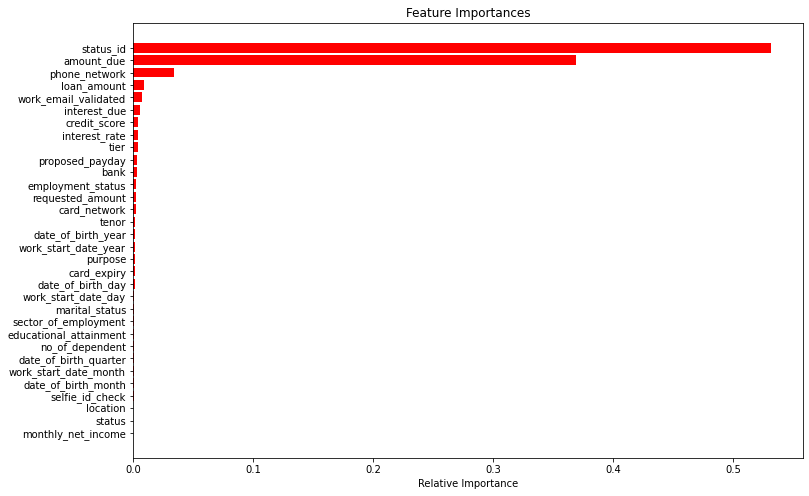

In [55]:
features=df.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')